In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_9_WT_150k_CS3.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,475.0,32,530.0,55.0,31.14,270.0,100.0,89.0,530.0,594.0
1,0.2,2,2,1,800.0,53,807.0,7.0,3.83,560.0,100.0,98.6,807.0,815.0
2,0.3,3,1,4,1367.0,91,1375.0,8.0,4.37,987.0,100.0,98.4,1375.0,1384.0
3,1.1,1,1,5,348.0,23,375.0,27.0,15.09,8.0,100.0,95.9,NaN,NaN
4,1.2,2,5,2,383.0,26,384.0,1.0,0.78,413.0,95.9,95.7,384.0,413.0


In [4]:
df["Arrival_t"] = df["Arrival"].apply(lambda x: int(round(x/15)))

In [5]:
driving = [0 for i in range(97)]
at_home = [0 for i in range(97)]
at_work = [0 for i in range(97)]
at_shopping = [0 for i in range(97)]
at_recreational = [0 for i in range(97)]
at_other = [0 for i in range(97)]

states = [driving, at_home, at_work, at_shopping, at_recreational, at_other]

In [6]:
df = df[0:1000]

In [7]:
df

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end,Arrival_t
0,0.1,1,1,2,475.0,32,530.0,55.0,31.14,270.0,100.0,89.0,530.0,594.0,35
1,0.2,2,2,1,800.0,53,807.0,7.0,3.83,560.0,100.0,98.6,807.0,815.0,54
2,0.3,3,1,4,1367.0,91,1375.0,8.0,4.37,987.0,100.0,98.4,1375.0,1384.0,92
3,1.1,1,1,5,348.0,23,375.0,27.0,15.09,8.0,100.0,95.9,NaN,NaN,25
4,1.2,2,5,2,383.0,26,384.0,1.0,0.78,413.0,95.9,95.7,384.0,413.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,250.2,2,2,1,1090.0,73,1099.0,9.0,5.39,825.0,100.0,98.1,1099.0,1110.0,73
996,251.1,1,1,3,491.0,33,501.0,10.0,5.59,12.0,100.0,98.4,NaN,NaN,33
997,251.2,2,3,1,513.0,34,523.0,10.0,5.66,157.0,98.4,96.9,523.0,561.0,35
998,251.3,3,1,4,680.0,45,687.0,7.0,4.05,104.0,100.0,98.9,687.0,701.0,46


In [8]:
df.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end,Arrival_t
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,811.000000,811.000000,1000.00000
mean,124.640400,2.873000,2.444000,2.487000,766.978000,51.138000,788.192000,24.094000,13.715520,339.65100,97.688200,91.576900,801.622688,819.503083,52.55400
std,73.006708,1.702283,1.382308,1.379759,259.702377,17.312212,262.013756,33.709843,19.174182,411.32123,6.464324,12.288022,268.592046,284.241587,17.47405
min,0.100000,1.000000,1.000000,1.000000,273.000000,18.000000,25.000000,0.000000,0.100000,0.00000,13.400000,0.000000,25.000000,6.000000,2.00000
25%,61.575000,1.000000,1.000000,1.000000,541.000000,36.000000,566.500000,5.000000,3.097500,26.00000,98.900000,90.200000,573.000000,598.500000,38.00000
50%,126.150000,3.000000,2.000000,2.000000,755.000000,50.000000,777.000000,13.000000,7.350000,105.50000,100.000000,95.700000,796.000000,808.000000,52.00000
75%,189.225000,4.000000,4.000000,4.000000,967.000000,64.000000,985.250000,29.000000,16.302500,587.00000,100.000000,98.300000,1002.500000,1034.000000,66.00000
max,251.400000,10.000000,5.000000,5.000000,1417.000000,94.000000,1421.000000,362.000000,206.190000,1460.00000,100.000000,100.000000,1421.000000,1435.000000,95.00000


In [9]:
no_cars = len(df[df["Trip_no"] == 1])
no_cars

252

In [10]:
# iterieren durch alle Zeilen
rows = df.shape[0]
for i in range (rows):
    
    # ZUHAUSE BIS ERSTER TRIP 
    if df.at[i,"Trip_no"] == 1:
        # Fahrzeug zuhause bis zum Zeitpunkt der ersten Abfahrt
        whyfrom = df.at[i, "Whyfrom"]
        for j in range(df.at[i, "Departure_t"]):
            states[whyfrom][j] += 1
    
    # FAHRZUSTAND DEPARTURE - ARRIVAL
    # Fahrzeug im Fahrzustand bis zur Ankunft am Ziel
    for j in range(df.at[i, "Departure_t"], df.at[i, "Arrival_t"]):
        states[0][j] += 1
    
    whyto = df.at[i, "Whyto"]
    # ANKUNFT BIS NÄCHSTER TAG ODER ABFAHRT NÄCHSTER TRIP 
    # wenn letzter Trip der Person: Aufenthalt bis zum nächsten Morgen am Zielzustand
    if (i == rows-1) or (df.at[i+1,"Trip_no"] == 1):
        for j in range(df.at[i, "Arrival_t"], 97):
            states[whyto][j] +=1
    else:
        for j in range(df.at[i, "Arrival_t"], df.at[i+1, "Departure_t"]):
            states[whyto][j] +=1     
        
            
                

In [11]:
states[0] = [x/no_cars for x in states[0]]
states[1] = [x/no_cars for x in states[1]]
states[2] = [x/no_cars for x in states[2]]
states[3] = [x/no_cars for x in states[3]]
states[4] = [x/no_cars for x in states[4]]
states[5] = [x/no_cars for x in states[5]]

In [12]:
x = np.linspace(0, 96, 97)

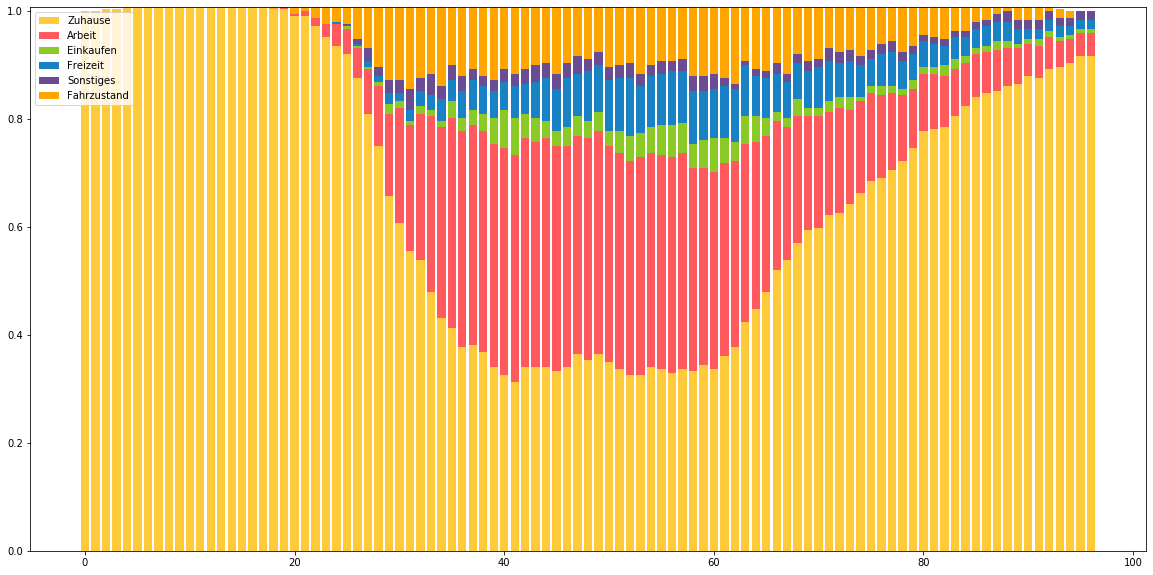

In [13]:
plt.figure(figsize=(20,10))

plt.bar(x, states[1], label="Zuhause", color='#FFCA3A' )
plt.bar(x, states[2], bottom=states[1], label="Arbeit", color='#FF595E');
plt.bar(x, states[3], bottom=[i+j for i,j in zip(states[1], states[2])], label="Einkaufen", color='#8AC926');
plt.bar(x, states[4], bottom=[i+j+k for i,j,k in zip(states[1], states[2], states[3])], label="Freizeit", color='#1982C4');
plt.bar(x, states[5], bottom=[i+j+k+l for i,j,k,l in zip(states[1], states[2], states[3], states[4])], label="Sonstiges", color='#6A4C93');
plt.bar(x, states[0], bottom=[i+j+k+l+m for i,j,k,l,m in zip(states[1], states[2], states[3], states[4], states[5])], label="Fahrzustand", color="orange");
plt.legend()

## Skalieren der Zustandsverteilungen zu Summe 1
### Vorübergehende Lösung -> Problemursache finden 

In [25]:
scaling_factor = []
for i in range(97):    
    scaling_factor.append(states[0][i] + states[1][i] + states[2][i] + states[3][i] + states[4][i] + states[5][i]) 
    for j in range(5):
        states[j][i] = states[j][i]/scaling_factor[i]

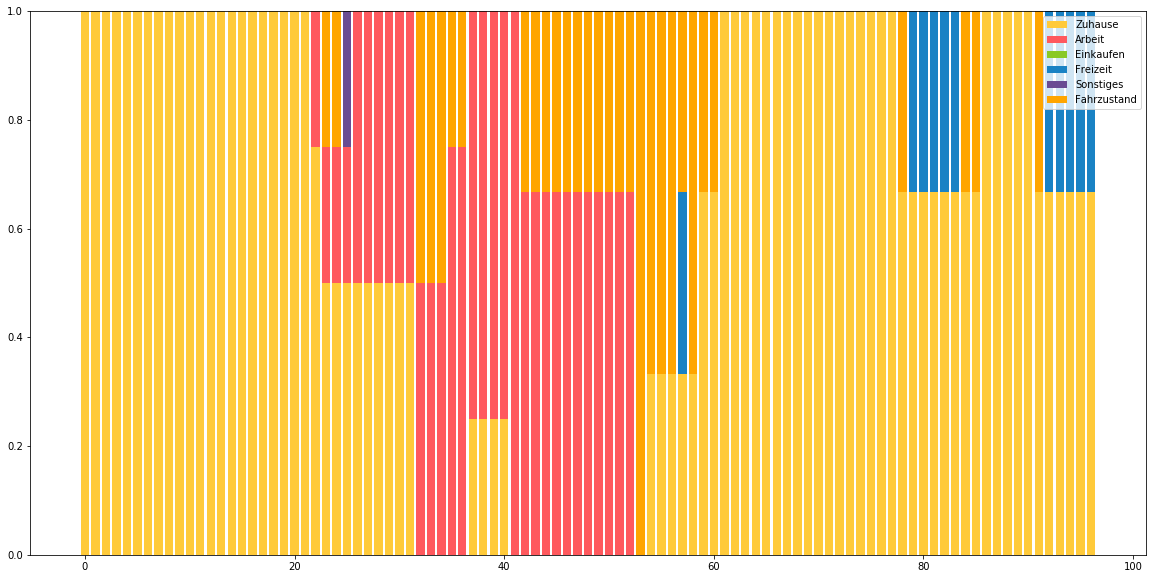

In [26]:
plt.figure(figsize=(20,10))

plt.bar(x, states[1], label="Zuhause", color='#FFCA3A' )
plt.bar(x, states[2], bottom=states[1], label="Arbeit", color='#FF595E');
plt.bar(x, states[3], bottom=[i+j for i,j in zip(states[1], states[2])], label="Einkaufen", color='#8AC926');
plt.bar(x, states[4], bottom=[i+j+k for i,j,k in zip(states[1], states[2], states[3])], label="Freizeit", color='#1982C4');
plt.bar(x, states[5], bottom=[i+j+k+l for i,j,k,l in zip(states[1], states[2], states[3], states[4])], label="Sonstiges", color='#6A4C93');
plt.bar(x, states[0], bottom=[i+j+k+l+m for i,j,k,l,m in zip(states[1], states[2], states[3], states[4], states[5])], label="Fahrzustand", color="orange");
plt.legend()

## Vergleich mit NHTS Daten

In [14]:
import pickle

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Zustandsverteilung.pickle"

states_nhts = pickle.load(open(path, "rb"))

Text(0.5, 1.0, 'Anteil der Flotte im Fahrzustand')

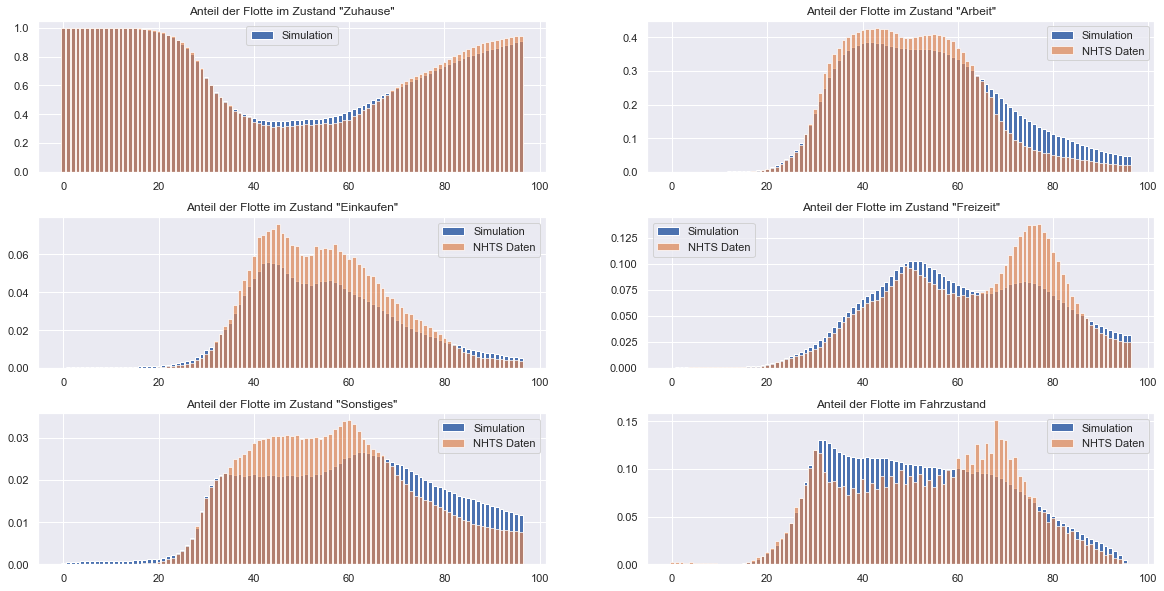

In [15]:
sns.set()
fig, axs = plt.subplots(3,2, figsize=(20,10))
plt.subplots_adjust(hspace=0.3)

axs[0][0].bar(x, states[1], label="Simulation")
axs[0][0].bar(x, states_nhts[1], alpha=0.7)
axs[0][0].legend()
axs[0][0].set_title("Anteil der Flotte im Zustand \"Zuhause\"")

axs[0][1].bar(x, states[2], label="Simulation")
axs[0][1].bar(x, states_nhts[2], alpha=0.7, label="NHTS Daten")
axs[0][1].legend()
axs[0][1].set_title("Anteil der Flotte im Zustand \"Arbeit\"")

axs[1][0].bar(x, states[3], label="Simulation")
axs[1][0].bar(x, states_nhts[3], alpha=0.7, label="NHTS Daten")
axs[1][0].legend()
axs[1][0].set_title("Anteil der Flotte im Zustand \"Einkaufen\"")

axs[1][1].bar(x, states[4], label="Simulation")
axs[1][1].bar(x, states_nhts[4], alpha=0.7, label="NHTS Daten")
axs[1][1].legend()
axs[1][1].set_title("Anteil der Flotte im Zustand \"Freizeit\"")

axs[2][0].bar(x, states[5], label="Simulation")
axs[2][0].bar(x, states_nhts[5], alpha=0.7, label="NHTS Daten")
axs[2][0].legend()
axs[2][0].set_title("Anteil der Flotte im Zustand \"Sonstiges\"")

axs[2][1].bar(x, states[0], label="Simulation")
axs[2][1].bar(x, states_nhts[0], alpha=0.7, label="NHTS Daten")
axs[2][1].legend()
axs[2][1].set_title("Anteil der Flotte im Fahrzustand")

In [16]:
for i in range(97):
    print("Simulation: ")
    print(sum([states[0][i], states[1][i], states[2][i], states[3][i], states[4][i],]))
    print("NHTS")
    print(sum([states_nhts[0][i], states_nhts[1][i], states_nhts[2][i], states_nhts[3][i], states_nhts[4][i]]))

Simulation: 
0.9997608720200335
NHTS
0.9999564314448787
Simulation: 
0.9995371319372349
NHTS
0.999884117591674
Simulation: 
0.9994392843949549
NHTS
0.9998699064772121
Simulation: 
0.9993742795982216
NHTS
0.9998627921083799
Simulation: 
0.9993156453990313
NHTS
0.9998701851304281
Simulation: 
0.9993029663385347
NHTS
0.9999134985511011
Simulation: 
0.9992901181821765
NHTS
0.9998775604275304
Simulation: 
0.999270653323784
NHTS
0.99987759481002
Simulation: 
0.9992446137677353
NHTS
0.9999064761658106
Simulation: 
0.9992185293905186
NHTS
0.9998849252013807
Simulation: 
0.9991924470823045
NHTS
0.9998849591245387
Simulation: 
0.999192553107686
NHTS
0.9998849764920705
Simulation: 
0.9991860793310094
NHTS
0.9999065836938242
Simulation: 
0.999173027572311
NHTS
0.9999209701985802
Simulation: 
0.9991271648608384
NHTS
0.9999066159040296
Simulation: 
0.9990550313020881
NHTS
0.9998850731581179
Simulation: 
0.9989960102892542
NHTS
0.9998419801325931
Simulation: 
0.998937000898956
NHTS
0.9997486047563982